In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("C:/Users/56961/Desktop/Proyecto ML CEN/dataset.csv/dataset.csv",sep=";")

In [3]:
dataset.drop(["node"],inplace=True,axis=1)

In [4]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [6]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [7]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")
train.head()

,consumption,substation,date
114231,-0.404716,AJAHUEL,2019-08-01
114232,-175.844684,BUIN,2019-08-01
114233,98.995407,BUIN,2019-08-01
114234,25.594385,LOSALME,2019-08-01
114235,78.314818,LOSALME,2019-08-01


In [8]:
test=dataset.query("date.dt.year==2022")

In [9]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [10]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [11]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [12]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [13]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

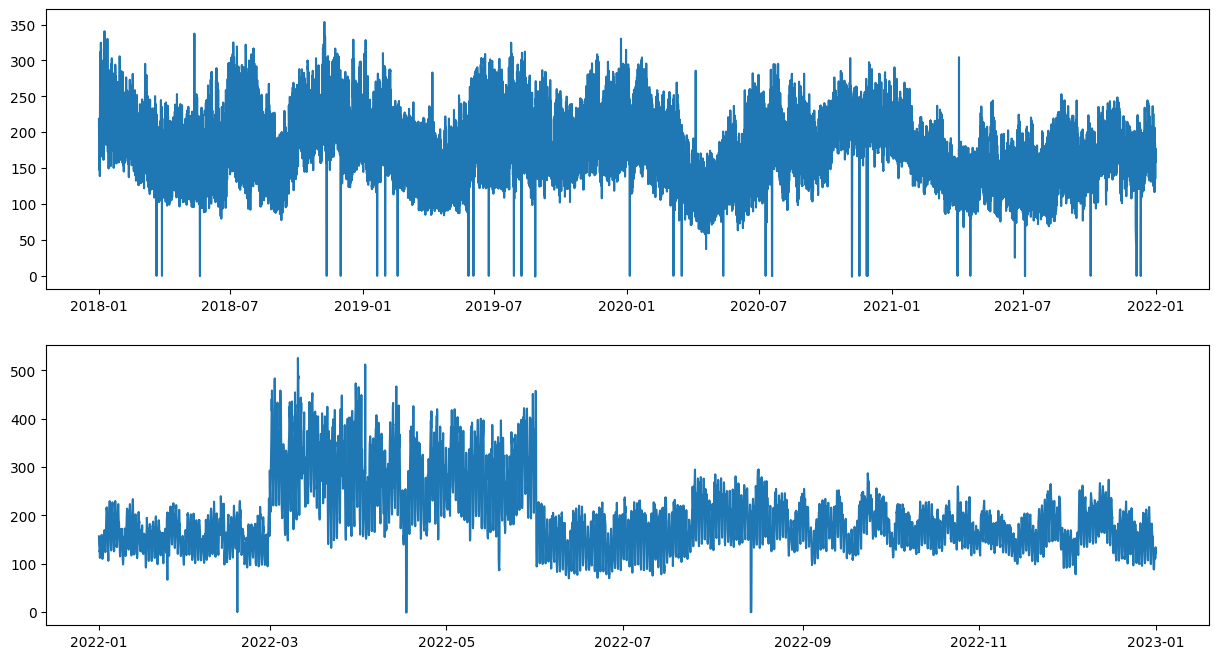

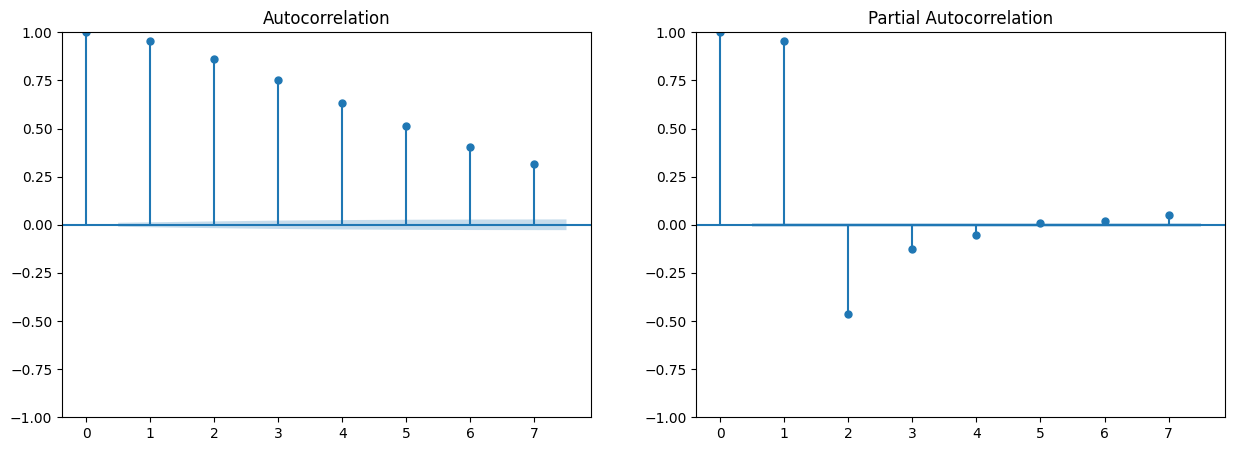

In [14]:
subestacion="LOSALME"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [15]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

In [16]:
data["year"]=data["date"].dt.year
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


,consumption,date,day,hour,month,year
date,,,,,,
2018-01-01 00:00:00,218.675048,2018-01-01 00:00:00,1,0,1,2018
2018-01-01 01:00:00,202.256765,2018-01-01 01:00:00,1,1,1,2018
2018-01-01 02:00:00,195.217009,2018-01-01 02:00:00,1,2,1,2018
2018-01-01 03:00:00,181.340299,2018-01-01 03:00:00,1,3,1,2018
2018-01-01 04:00:00,172.410573,2018-01-01 04:00:00,1,4,1,2018


In [17]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys_losalme.csv")

In [18]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_losalme.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

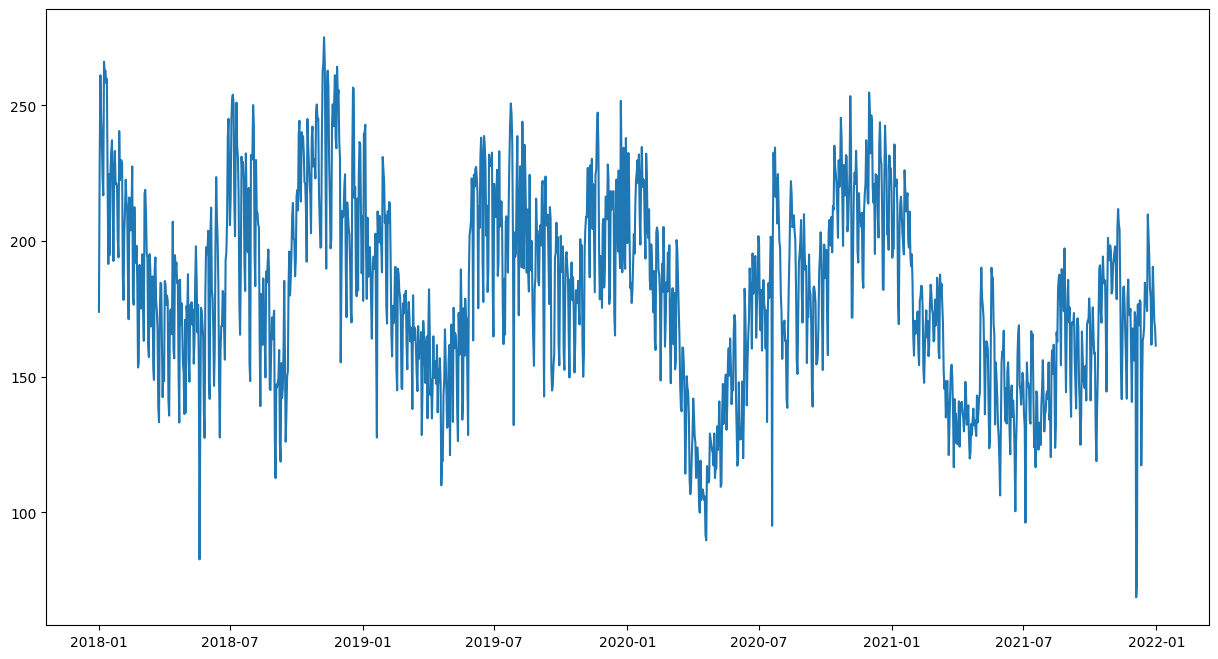

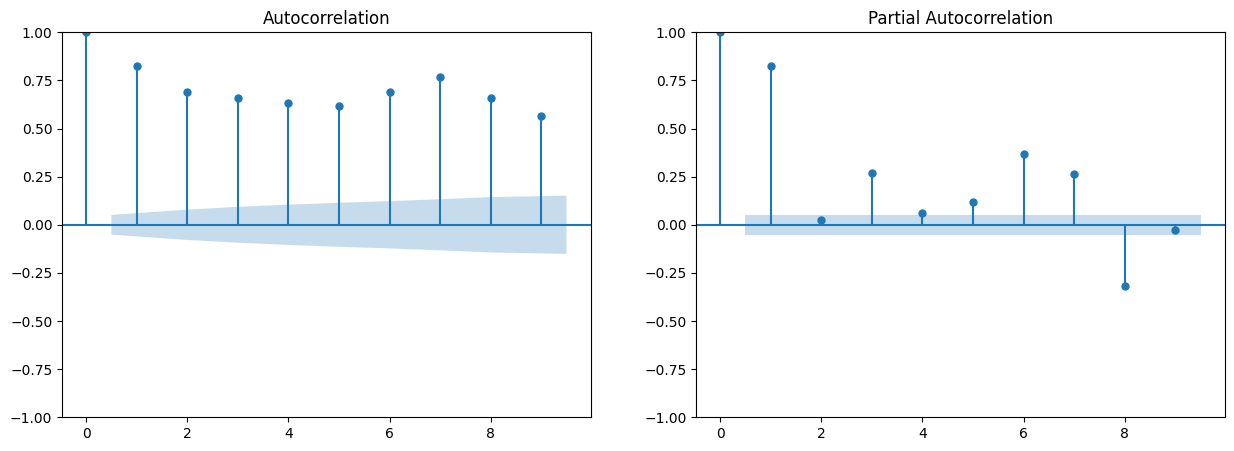

In [19]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.415777
p-value: 0.010433
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Los resultados del test de raíz unitaria (ADF) que has proporcionado indican que la serie temporal puede considerarse estacionaria con un nivel de significancia del 5%, ya que el valor de la estadística ADF es menor que el valor crítico correspondiente al 5%.

Aquí está el análisis de los resultados:

ADF Statistic: -3.415777: Este valor es menor que los valores críticos para los niveles de significancia del 1%, 5% y 10%, lo que sugiere que podemos rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria.
p-value: 0.010433: El valor p es menor que el nivel de significancia del 5%, lo que refuerza la evidencia en contra de la hipótesis nula.

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error


In [22]:
modelo_losalme_d=ARIMA(ys,order=(1,0,7))
m_ad1=modelo_losalme_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 290.37564336090804
AIC 12450.733553147518
MAPE 0.07489819054129718


In [23]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np

In [24]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)

# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']

# Ajustar el modelo ARIMA con los términos óptimos
modelo_losalme_d = ARIMA(ys, order=best_order)
m_ad1 = modelo_losalme_d.fit()

# Calcular el error cuadrático medio
mse = m_ad1.mse

# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic

# Realizar predicciones
ysp = m_ad1.predict()

# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_percentage_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12634.642, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12973.248, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12958.266, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12917.150, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12971.249, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12633.998, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12635.366, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12704.177, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12634.711, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12633.542, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=12632.311, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12633.210, Time=0.81 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=12634.264, Time=0.40 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=12610.745, Time=1.53 sec
 ARIMA(2,1,5)(0,0,0

c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


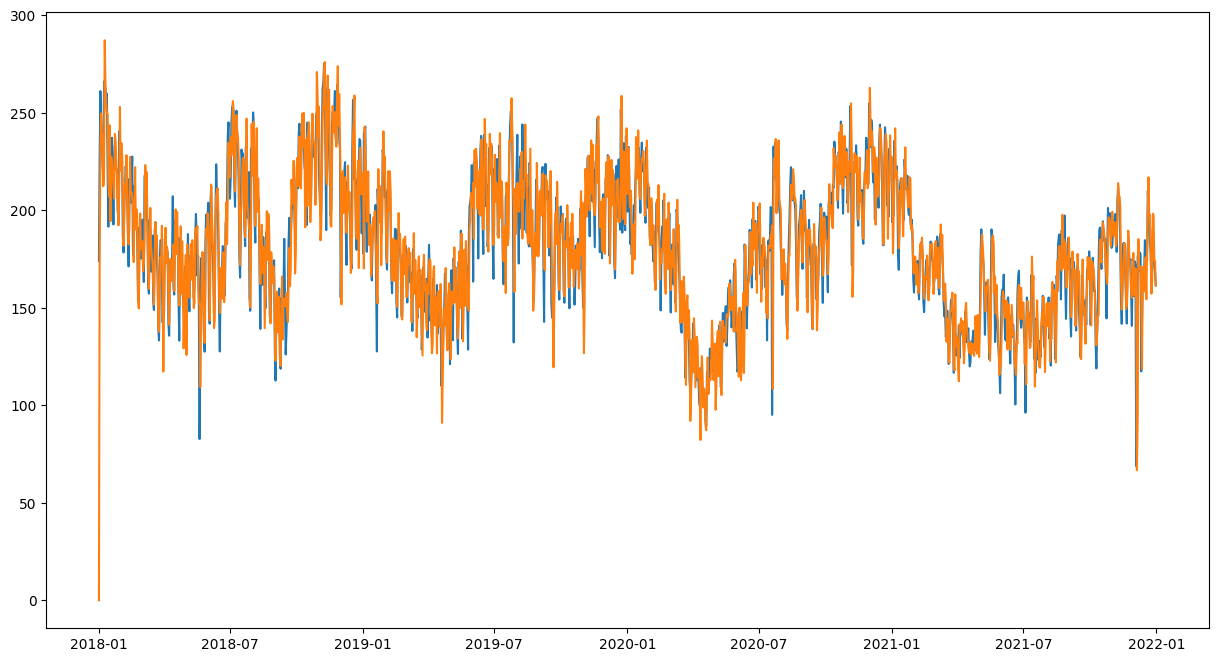

In [25]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [26]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [27]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [28]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [29]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [30]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 32866.5195 - mae: 177.9015 - mape: 97.5387 - mse: 32866.5195
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25959.9062 - mae: 157.2995 - mape: 85.7884 - mse: 25959.9062
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19600.0098 - mae: 135.5642 - mape: 73.3884 - mse: 19600.0098
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13750.9443 - mae: 111.9035 - mape: 59.8932 - mse: 13750.9443
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8707.7578 - mae: 86.5299 - mape: 45.4710 - mse: 8707.7578  
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4860.8154 - mae: 61.1200 - mape: 31.2841 - mse: 4860.8154
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2445.8557 - mae: 40.7180 - mape: 20.8015 - mse: 2445.8557
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1381.0024 - mae: 30.2266 - mape: 16.5795 - mse: 1381.0024
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


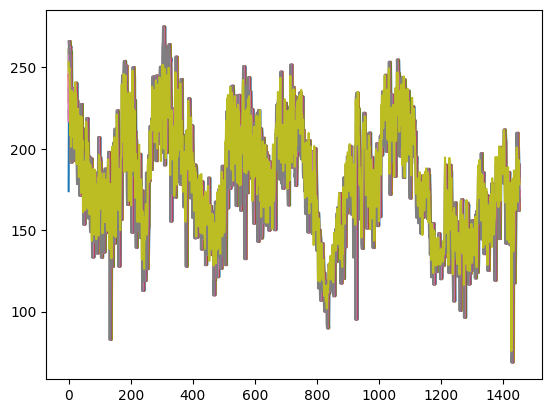

In [32]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [33]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 485.1875 - mae: 16.8482 - mape: 9.3298 - mse: 485.1875 
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 276.1411 - mae: 12.9412 - mape: 7.4663 - mse: 276.1411
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 266.1100 - mae: 12.5700 - mape: 7.1968 - mse: 266.1100
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 251.5073 - mae: 12.4082 - mape: 7.1975 - mse: 251.5073
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 241.4807 - mae: 11.9287 - mape: 6.7985 - mse: 241.4807
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 226.9698 - mae: 11.7442 - mape: 6.7771 - mse: 226.9698
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 219.2357 - mae: 11.4488 - mape: 6.5257 - mse: 219.2357
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 206.5103 - mae: 11.1781 - mape: 6.4294 - mse: 206.5103
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 200.4494 - mae: 10.9496 - mape: 6.272

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


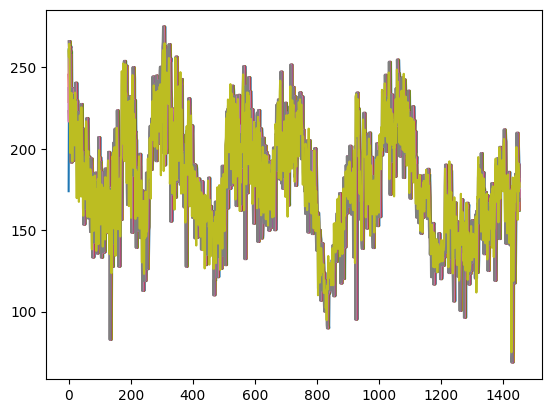

In [34]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

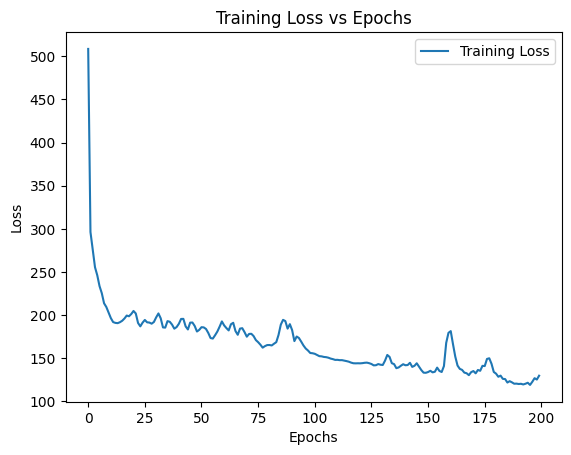

In [35]:
import matplotlib.pyplot as plt

# Graficar Loss vs Epochs
plt.plot(rnn.history['loss'], label='Training Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
from keras.layers import MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model

In [37]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [38]:
yw[:1]

array([[173.90211771, 228.72666583, 261.06764679, 245.42599421,
        237.16953279, 223.08197829, 216.82170162, 266.05394942]])

In [39]:
np.flip(yw[:1])

array([[266.05394942, 216.82170162, 223.08197829, 237.16953279,
        245.42599421, 261.06764679, 228.72666583, 173.90211771]])

In [40]:
tensor=tf.constant(yw[:1])
tensor

<tf.Tensor: shape=(1, 8), dtype=float64, numpy=
array([[173.90211771, 228.72666583, 261.06764679, 245.42599421,
        237.16953279, 223.08197829, 216.82170162, 266.05394942]])>

In [41]:
import keras
from keras.layers import Lambda
layer = Lambda(lambda x: keras.ops.flip(x))
layer(tensor)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[266.05396, 216.8217 , 223.08199, 237.16954, 245.426  , 261.06766,
        228.72667, 173.90211]], dtype=float32)>

In [42]:
d=128
input=Input(name="activity",shape=(8,1))
reverse=Lambda(lambda x: keras.ops.flip(x))(input)
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, reverse,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 8, 1)      │          0 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      1,025 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
tag="mhatt"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 35927.6836 - mae: 186.2309 - mape: 102.2346 - mse: 35927.6836
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31206.7207 - mae: 173.3829 - mape: 95.0946 - mse: 31206.7207
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19101.2480 - mae: 133.9957 - mape: 73.1710 - mse: 19101.2480
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3337.0505 - mae: 49.7114 - mape: 26.8741 - mse: 3337.0505
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3792.2693 - mae: 54.7691 - mape: 31.4524 - mse: 3792.2693
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1970.4232 - mae: 36.2107 - mape: 20.8955 - mse: 1970.4232
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1223.7228 - mae: 28.2429 - mape: 15.1654 - mse: 1223.7228
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1458.1470 - mae: 31.5191 - mape: 16.8037 - mse: 1458.1470
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 765.

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


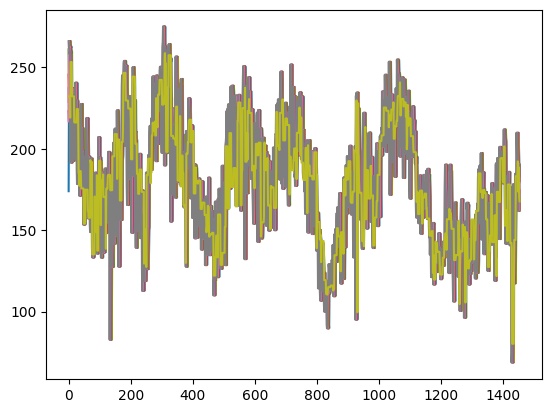

In [44]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [45]:
tag="mhatt"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 817.2134 - mae: 22.3940 - mape: 12.5431 - mse: 817.2134
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 765.8940 - mae: 21.8041 - mape: 12.2284 - mse: 765.8940
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 716.5770 - mae: 20.6895 - mape: 11.8559 - mse: 716.5770
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 466.6656 - mae: 17.0636 - mape: 9.6022 - mse: 466.6656
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 530.0243 - mae: 17.7014 - mape: 10.1222 - mse: 530.0243
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 567.7344 - mae: 18.5373 - mape: 10.4733 - mse: 567.7344
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 570.4829 - mae: 18.3866 - mape: 10.4653 - mse: 570.4829
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 492.2263 - mae: 17.4009 - mape: 9.8551 - mse: 492.2263
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 573.4067 - mae: 18.4443 - mape: 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


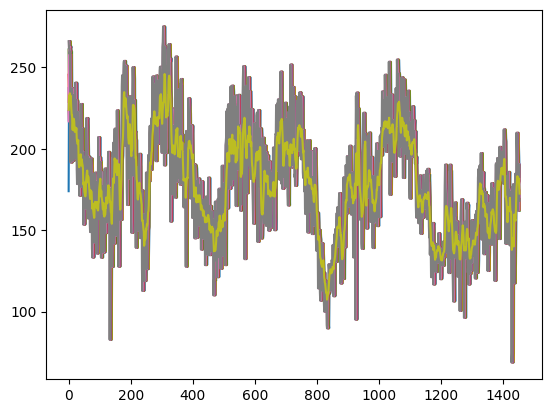

In [46]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [47]:
yw.shape

(1453, 8)

In [48]:
_,attention_scores=model.layers[2](yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                return_attention_scores=True)

In [49]:
attention_scores.shape

TensorShape([1, 1, 8, 8])

In [50]:
import seaborn as sb

In [51]:
timesteps = ["t"+str(i) for i in range(8)]
timesteps.reverse()

In [52]:
timesteps

['t7', 't6', 't5', 't4', 't3', 't2', 't1', 't0']

<Axes: >

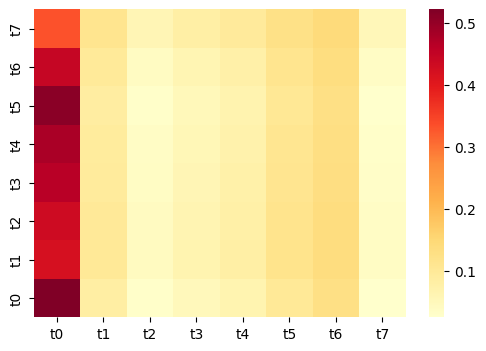

In [53]:
xticklb = timesteps.copy()
xticklb.reverse()
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

Modelo Attention

In [54]:
yw.shape

(1453, 8)

In [55]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [56]:
W=model.layers[1].get_weights()

In [57]:
componentes=["query","query_bias","key","key_bias","value","value_bias",
             "projection","projection"]
for name, out in zip(componentes,W):
    print(name, out.shape)

In [58]:
len(W)

0

In [59]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention = Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model2=Model(inputs=input,outputs=output)
model2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 8, 128)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 8, 128)    │     16,512 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model2.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model2.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 12861.0996 - mae: 97.0173 - mape: 53.1235 - mse: 12861.0996
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4368.0122 - mae: 57.7885 - mape: 33.0431 - mse: 4368.0122
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2159.3220 - mae: 41.7159 - mape: 22.1437 - mse: 2159.3220
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 691.1852 - mae: 21.1193 - mape: 11.8032 - mse: 691.1852
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1016.1301 - mae: 25.3727 - mape: 15.1366 - mse: 1016.1301
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 538.5165 - mae: 19.2173 - mape: 10.5324 - mse: 538.5165
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 525.6477 - mae: 18.6557 - mape: 10.3094 - mse: 525.6477
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 507.6197 - mae: 17.1173 - mape: 10.2138 - mse: 507.6197
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 429.4340 - mae: 16.8286 - mape: 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


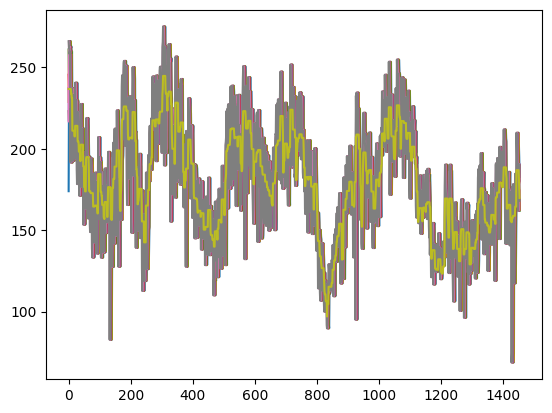

In [61]:
xw=[i for i in range(len(yw))]
yp=model2.predict(yw)
plt.plot(xw,yw,xw,yp)

In [62]:
attention_output,attention_scores=model2.layers[4]([yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1)],
                return_attention_scores=True)

<Axes: >

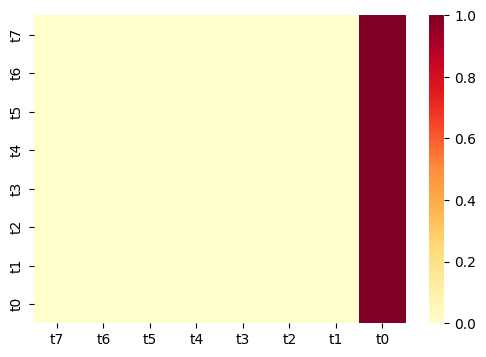

In [63]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


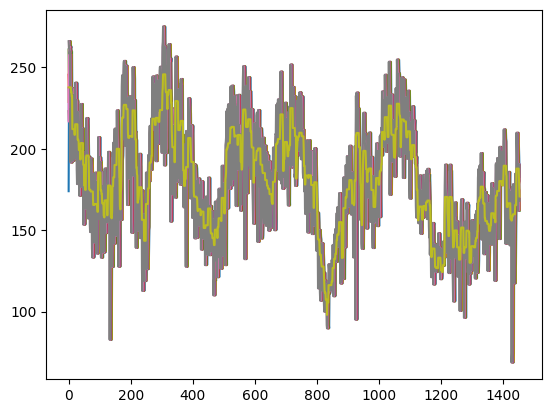

In [65]:
xw=[i for i in range(len(yw))]
yp=model2.predict(yw)
plt.plot(xw,yw,xw,yp)